In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# Model development module
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Plotting
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
df = pd.read_csv(filepath)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [7]:
# Drop unneed column
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1, inplace = True)

# Using Cross validation to improve the model

1. Divide the dataset into x_data and y_data parameters. Here y_data is the "Price" attribute, and x_data has all other attributes in the data set.

2. Create a single variable linear regression model using "CPU_frequency" parameter. Print the R^2 value of this model for the training and testing subsets.

3. Run a 4-fold cross validation on the model and print the mean value of R^2 score along with its standard deviation.

In [20]:
# 1. Divide the dataset into x_data and y_data parameters. 
#    Here y_data is the "Price" attribute, and x_data has all other 
#   attributes in the data set.

y_data = df[["Price"]]
x_data = df.drop(["Price"], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size = 0.1,
                                                    random_state = 1)

print("Training Set, Shape: ", x_train.shape[0])
print("Testing Set, Shape: ", x_test.shape[0])

Training Set, Shape:  214
Testing Set, Shape:  24


In [21]:
# 2. Create a single variable linear regression model using "CPU_frequency" parameter. 
#    Print the R^2 value of this model for the training and testing subsets.
lm = LinearRegression()
lm.fit(x_train[["CPU_frequency"]], y_train)

print("Training Set, R^2: ", lm.score(x_train[["CPU_frequency"]], y_train))
print("Training Set, R^2: ", lm.score(x_test[["CPU_frequency"]], y_test))

Training Set, R^2:  0.14829792099817984
Training Set, R^2:  -0.06599437350393811


In [24]:
# 3. Run a 4-fold cross validation on the model 
#    Print the mean value of R^2 score along with its standard deviation

cross_lm = cross_val_score(lm, x_train[["CPU_frequency"]], y_train, cv=4)

print("Cross Validation, R^2 mean: ", cross_lm.mean())
print("Cross Validation, Standard Deviation: ", cross_lm.std())


Cross Validation, R^2 mean:  0.12738818019555015
Cross Validation, Standard Deviation:  0.08317058010912026


# Overfitting

1. Split the data set into training and testing components again, this time reserving 50% of the data set for testing.
2. To identify the point of overfitting the model on the parameter "CPU_frequency", you'll need to create polynomial features using the single attribute. You need to evaluate the R^2 scores of the model created using different degrees of polynomial features, ranging from 1 to 5. Save this set of values of R^2 score as a list.
3. Plot the values of R^2 scores against the order. Note the point where the score drops.


In [26]:
# 1. Split the data set into training and testing components 
#    Reserving 50% of the data set for testing

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                   test_size = 0.5,
                                                   random_state = 0)


In [33]:
# 2. To identify the point of overfitting the model on the parameter "CPU_frequency"
#    Create polynomial features using the single attribute. 
#    Evaluate the R^2 scores of the model created using different degrees of 
#    polynomial features, ranging from 1 to 5. 
#    Save this set of values of R^2 score as a list

order = [1, 2, 3, 4, 5]
Rsqu_test = []

for n in order:
    poly = PolynomialFeatures(degree = n)

    x_train_pr = poly.fit_transform(x_train[["CPU_frequency"]])
    x_test_pr = poly.fit_transform(x_train[["CPU_frequency"]])
    
    lm.fit(x_train_pr, y_train)
    
    print("Order ", n, ": ", lm.score(x_test_pr, y_test))
    Rsqu_test.append(lm.score(x_test_pr, y_test))
    

Order  1 :  -0.3778635840536677
Order  2 :  -0.583865722311901
Order  3 :  -0.6203187064944935
Order  4 :  -0.669271987889339
Order  5 :  -0.7095758659179585


Text(0.5, 1.0, 'R^2 Using Test Data')

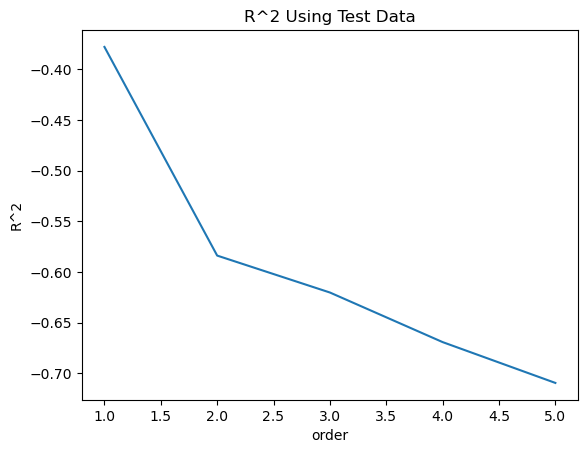

In [36]:
# Plot the values of R^2 scores against the order. 
# Note the point where the score drops.

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

# Ridge Regression

1. Consider that you have multiple features, i.e. 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU' and 'Category'. Create a polynomial feature model that uses all these parameters with degree=2. Also create the training and testing attribute sets.

In [41]:
# 1. Create a polynomial feature model that uses all these parameters with degree=2. 
#    Also create the training and testing attribute sets.

ploy1 = PolynomialFeatures(degree = 2)

x_train_pr2 = poly.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 
                                          'Storage_GB_SSD', 'CPU_core',
                                          'OS','GPU', 'Category']])
x_test_pr2 = poly.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU', 'Category']])

In [42]:
# 2. Create a Ridge Regression model and evaluate it using values of the 
#    hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001. 
#   Create a list of all Ridge Regression R^2 scores for training and testing data.

Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|███| 999/999 [00:02<00:00, 439.56it/s, Test Score=-.454, Train Score=0.283]


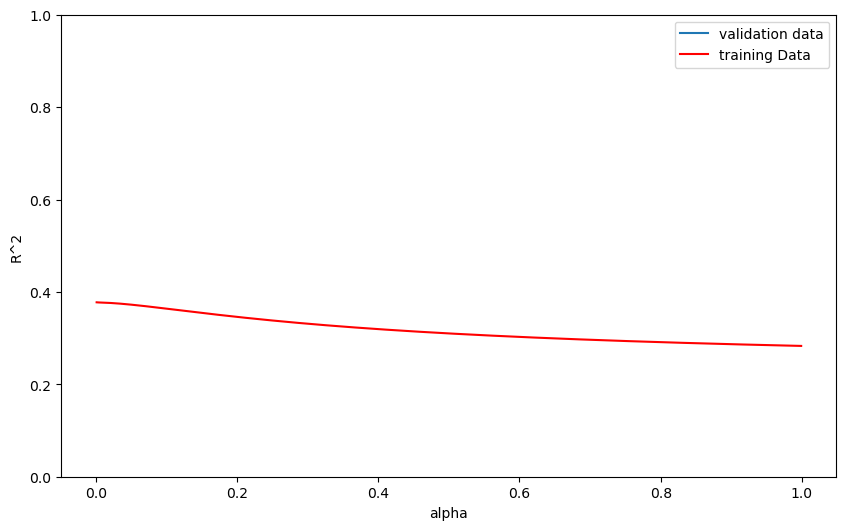

In [43]:
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

# Grid Search

1. Using the raw data and the same set of features as used above, use GridSearchCV to identify the value of alpha for which the model performs best. Assume the set of alpha values to be used as
```math
{0.0001, 0.001, 0.01, 0.1, 1, 10}
```

2. Create a Ridge instance and run Grid Search using a 4 fold cross validation.
3. Fit the Grid Search to the training data.
4. Print the R^2 score for the test data using the estimator that uses the derived optimum value of alpha.

In [45]:
# 1. Use GridSearchCV to identify the value of alpha for which the model performs best. 
#    Assume the set of alpha values to be used as {0.0001, 0.001, 0.01, 0.1, 1, 10}

parameters1= [{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]


In [48]:
# 2. Create a Ridge instance and run Grid Search using a 4 fold cross validation.

RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)

# 3. Fit the Grid Search to the training data.

Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core',
                    'OS','GPU', 'Category']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [54]:
# 4. Print the R^2 score for the test data using the 
#    estimator that uses the derived optimum value of alpha.

BestRR=Grid1.best_estimator_
print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 
                           'CPU_core','OS','GPU','Category']], y_test))

0.300990504869182
